In [2]:
# To be able to make edits to repo without having to restart notebook
%load_ext autoreload
%autoreload 2

In [123]:
import numpy as np

def _arrange_spikes2(pos_t, pos_x, pos_y, shuffled_times):
    n_repeats, n_samples = shuffled_times.shape

    # Reshape pos_t, pos_x, pos_y to (nsamples,)
    pos_t = pos_t.squeeze()
    pos_x = pos_x.squeeze()
    pos_y = pos_y.squeeze()

    # Repeat pos_t, pos_x, pos_y along axis 0 to match the shape of shuffled_times
    pos_t_repeated = np.repeat(pos_t, n_repeats).reshape(n_samples, n_repeats).T
    pos_x_repeated = np.repeat(pos_x, n_repeats).reshape(n_samples, n_repeats).T
    pos_y_repeated = np.repeat(pos_y, n_repeats).reshape(n_samples, n_repeats).T

    # Find the indices of the closest pos_t values for each shuffled time
    indices = np.abs(pos_t_repeated - shuffled_times).argmin(axis=1)

    # Retrieve the corresponding pos_x and pos_y values using the indices
    shuffled_spikes_x = pos_x_repeated[np.arange(n_repeats)[:, np.newaxis], indices].T
    shuffled_spikes_y = pos_y_repeated[np.arange(n_repeats)[:, np.newaxis], indices].T

    return shuffled_spikes_x, shuffled_spikes_y





# @jit(nopython=True)
def _arrange_spikes(pos_t, pos_x, pos_y, shuffled_times):
    shuffled_spikes_x = np.empty_like(shuffled_times)
    shuffled_spikes_y = np.empty_like(shuffled_times)

    for i in range(shuffled_times.shape[0]):
        for j in range(shuffled_times.shape[1]):
            time = shuffled_times[i, j]
            index = np.abs(pos_t - time).argmin()
            shuffled_spikes_x[i, j] = pos_x[index]
            shuffled_spikes_y[i, j] = pos_y[index]

    return shuffled_spikes_x, shuffled_spikes_y

In [124]:
pos_t = np.array([1, 2, 3]).reshape(-1, 1)
pos_x = np.array([4, 5, 6]).reshape(-1, 1)
pos_y = np.array([7, 8, 9]).reshape(-1, 1)
shuffled_times = np.array([[1, 2, 3], [2, 3, 4]])

output1 = _arrange_spikes(pos_t, pos_x, pos_y, shuffled_times)
output2 = _arrange_spikes2(pos_t, pos_x, pos_y, shuffled_times)

print(output1)
print(output2)


(array([[4, 5, 6],
       [5, 6, 6]]), array([[7, 8, 9],
       [8, 9, 9]]))
(array([[4, 4],
       [4, 4]]), array([[7, 7],
       [7, 7]]))


In [40]:
shuffled_times.shape

(2, 3)

In [3]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import tkinter as tk
from scipy import signal
from scipy import ndimage
from math import ceil
import cv2
import ot as pot
import itertools
import matplotlib.patches as patches

PROJECT_PATH = os.path.dirname(os.path.abspath(os.getcwd()))
# PROJECT_PATH = os.getcwd()
sys.path.append(os.path.dirname(PROJECT_PATH))

from _prototypes.cell_remapping.src.remapping import pot_sliced_wasserstein
from _prototypes.cell_remapping.src.wasserstein_distance import _get_ratemap_bucket_midpoints, single_point_wasserstein

unit_matcher_path = os.getcwd()
prototype_path = os.path.abspath(os.path.join(unit_matcher_path, os.pardir))
project_path = os.path.abspath(os.path.join(prototype_path, os.pardir))
lab_path = os.path.abspath(os.path.join(project_path, os.pardir))
sys.path.append(project_path)
os.chdir(project_path)
print(project_path)

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit


In [8]:
from _prototypes.cell_remapping.main import main
from _prototypes.cell_remapping.src.settings import settings_dict
from x_io.rw.axona.batch_read import make_study
from library.study_space import Animal

settings_dict['useMatchedCut'] = False

# path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\20190306-1100-circle-object270-2_converted_1"
path = r"C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\NON_sample\NON-73-6_20180606"
study = make_study(path,settings_dict=settings_dict)
study.make_animals()

SKIPPING, NO FILES FOUND FOR SESSION WITH SIGNATURE: C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\NON_sample\NON-73-6_20180606/Spatial_Shuffle_1/session_NON-73-6_20180606-ROUND-3000-NO/Tetrode
SKIPPING, NO FILES FOUND FOR SESSION WITH SIGNATURE: C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\NON_sample\NON-73-6_20180606/All_Neurofunc_Sessions_iter_1/neurofunc_session_NON-73-6_20180606-ROUND-3000-2
SKIPPING, NO FILES FOUND FOR SESSION WITH SIGNATURE: C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\NON_sample\NON-73-6_20180606/All_Neurofunc_Sessions_iter_1/neurofunc_session_NON-73-6_20180606-ROUND-3000-270-2/Tetrode
SKIPPING, NO FILES FOUND FOR SESSION WITH SIGNATURE: C:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit_test_data\NON_sample\NON-73-6_20180606/All_Neurofunc_Sessions_iter_1/neurofunc_session_NON-73-6_20180606-ROUND-3000-270
SKIPPING, N

c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\library\spike\sort_spikes_by_cell.py:133: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  good_cells = np.asarray(cells)[idx]
c:\Users\aaoun\OneDrive - cumc.columbia.edu\Desktop\HussainiLab\neuroscikit\library\spike\sort_spikes_by_cell.py:134: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  good_sorted_waveforms = np.asarray(sorted_waveforms)[idx]


Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted by cell
Session data added, spikes sorted 

Using speed bounds 0 to 100


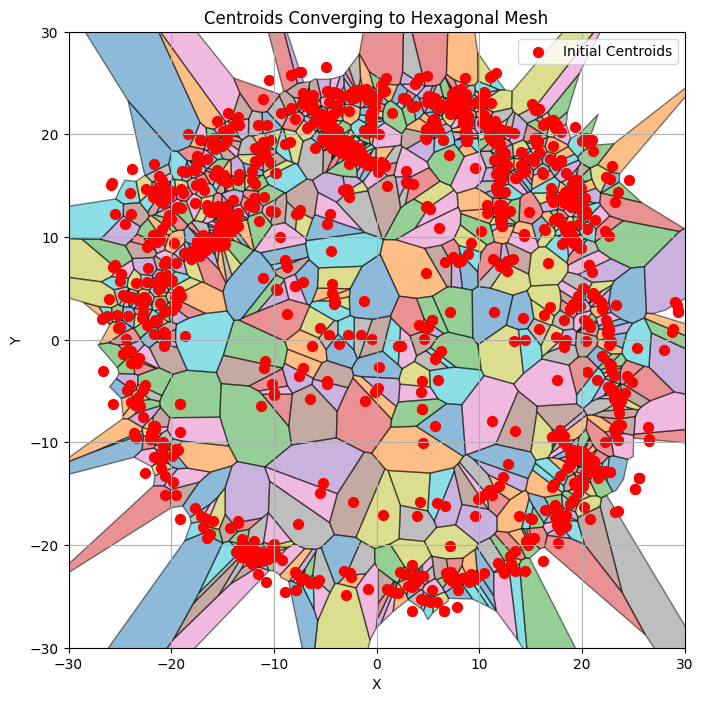

In [32]:
from library.study_space import SpatialSpikeTrain2D
from scipy.spatial import Voronoi


pos_data = study.animals[0].sessions['session_1'].get_position_data()['position']
ensemble = study.animals[0].sessions['session_1'].get_cell_data()['cell_ensemble']
cell = ensemble.cells[1]
ses = study.animals[0].sessions['session_1']
spatial_spike_train = ses.make_class(SpatialSpikeTrain2D,{   'cell': cell, 'position': pos_data, 'speed_bounds': (0,100)})   

# raterate_objmap = spatial_spike_train.get_map('rate')
# rate_map, rate_map_raw = rate_obj.get_rate_map(new_size=32)


prev_spike_pos_x, prev_spike_pos_y, prev_spike_pos_t = spatial_spike_train.spike_x, spatial_spike_train.spike_y, spatial_spike_train.new_spike_times
prev_pts = np.array([prev_spike_pos_x, prev_spike_pos_y]).T
# comehere
vor = Voronoi(prev_pts)

# Get the Voronoi regions and plot them
plt.figure(figsize=(8, 8))
for region in vor.regions:
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), edgecolor='black', linewidth=1, alpha=0.5)

# Plot the centroids
plt.scatter(prev_pts[:, 0], prev_pts[:, 1], color='red', marker='o', s=50, label='Initial Centroids')

# Plot settings
plt.xlim(-30, 30)
plt.ylim(-30, 30)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Centroids Converging to Hexagonal Mesh')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [19]:
vor.min_bound

array([-28.7       , -26.46666667])

In [14]:
prev_pts.shape

(3482, 2)

In [4]:
pos = study.sessions[0].get_position_data()['position']
x = pos.x
y = pos.y

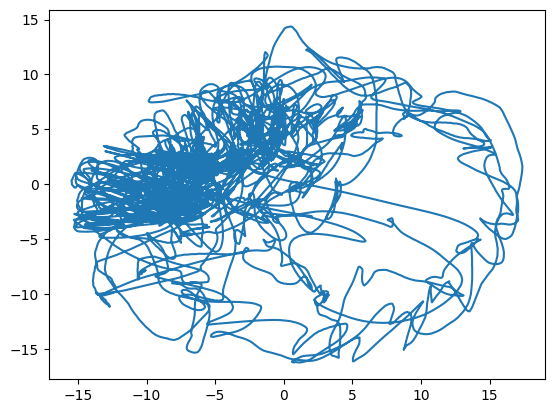

In [5]:
plt.plot(x,y)